In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/Users/nandh/Downloads/advertising.csv")

In [7]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [17]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [21]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales'] 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLinear Regression Performance:")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
Intercept: 4.714126402214134
Coefficients: [0.05450927 0.10094536 0.00433665]
Mean Squared Error: 2.907756910271091
R² Score: 0.9059011844150826


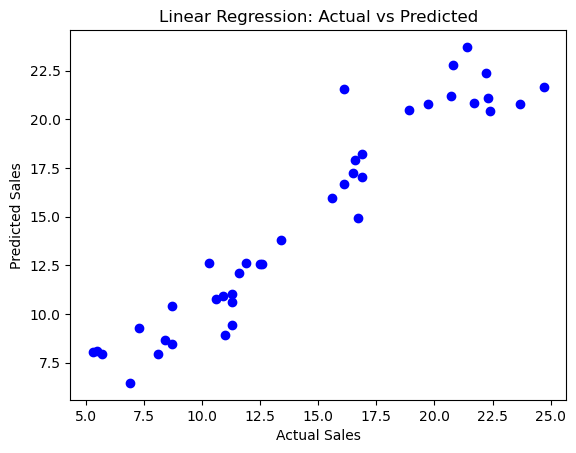

In [31]:
plt.scatter(y_test, y_pred_lr, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
Mean Squared Error: 1.4374328500000009
Mean Absolute Error: 0.9179999999999993
R² Score: 0.9534827934927883


In [35]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", importance)


Feature Importance:
      Feature  Importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


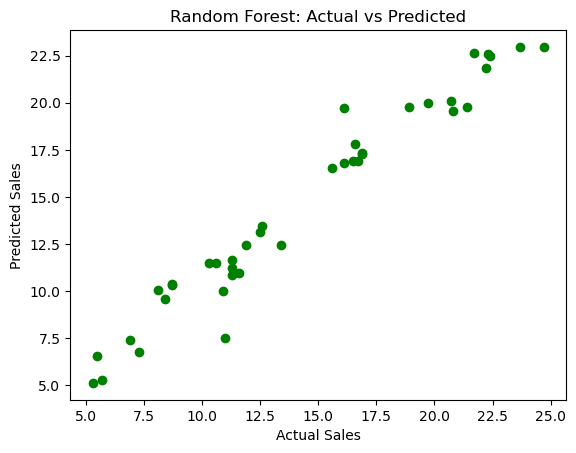

In [37]:
plt.scatter(y_test, y_pred_rf, color='green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [39]:
#Predict Future Sales
new_data = pd.DataFrame({
    'TV': [150, 200],
    'Radio': [25, 40],
    'Newspaper': [30, 50]
})
future_sales_lr = lr_model.predict(new_data)
future_sales_rf = rf_model.predict(new_data)
print("\nPredicted Sales for new budgets (Linear Regression):", future_sales_lr)
print("Predicted Sales for new budgets (Random Forest):", future_sales_rf)


Predicted Sales for new budgets (Linear Regression): [15.54425049 19.87062741]
Predicted Sales for new budgets (Random Forest): [14.592 21.006]
